### Ascribing Machine Learning Classifiers to diagnose the attacks of *Phytophthora infestans* on Leaves of *Solanum tuberosum*

AUTHOR:  Anurag Dutta (anuragdutta.research@gmail.com)

CREATED: 2022-12-30 23:27:04

DATASET: https://github.com/Anurag-Dutta/Ascribing-Machine-Learning-Classifiers-to-diagnose-the-attacks-of-Phytophthora-infestans-on-Leaves-o/tree/main/dataset

### Load Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

### Prepare/collect data

In [2]:
import os

path = os.listdir('dataset/')
classes = {'Healthy':0, 'Late Blight':1}

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'dataset/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [5]:
np.unique(Y)

array([0, 1])

In [171]:
pd.Series(Y).value_counts()

1    1000
0     152
dtype: int64

In [6]:
X.shape, X_updated.shape

((1152, 200, 200), (1152, 40000))

### Visualize data

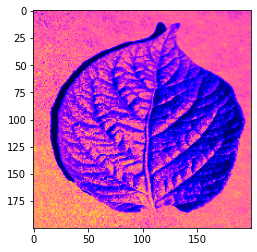

In [7]:
plt.imshow(X[0], cmap='gnuplot2')

### Prepare data

In [8]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1152, 40000)

### Split Data

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [10]:
xtrain.shape, xtest.shape

((921, 40000), (231, 40000))

### Feature Scaling

In [11]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

253 0
254 0
0.9921568627450981 0.0
0.996078431372549 0.0


### Train Model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [18]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


LogisticRegression(C=0.1)

In [19]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [20]:
knc = KNeighborsClassifier()
knc.fit(xtrain, ytrain)

KNeighborsClassifier()

In [21]:
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [22]:
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)

GaussianNB()

In [23]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

### Evaluation

In [24]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.8701298701298701


In [25]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9283387622149837
Testing Score: 0.8658008658008658


In [26]:
print("Training Score:", knc.score(xtrain, ytrain))
print("Testing Score:", knc.score(xtest, ytest))

Training Score: 0.8903365906623235
Testing Score: 0.8744588744588745


In [27]:
print("Training Score:", rfc.score(xtrain, ytrain))
print("Testing Score:", rfc.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.8701298701298701


In [28]:
print("Training Score:", gnb.score(xtrain, ytrain))
print("Testing Score:", gnb.score(xtest, ytest))

Training Score: 0.750271444082519
Testing Score: 0.7705627705627706


In [29]:
print("Training Score:", dt.score(xtrain, ytrain))
print("Testing Score:", dt.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.8225108225108225


### Prediction (SVM)

Precision:  0.8652173913043478
Recall:  1.0
F1 Score:  0.9277389277389276


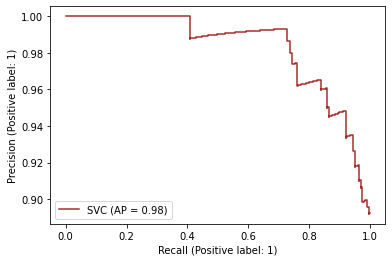

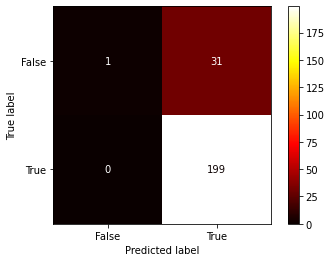

In [30]:
from sklearn import metrics
pred = sv.predict(xtest)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
f1_score = (2 * precision * recall) / (precision + recall)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ',f1_score)
disp = plot_precision_recall_curve(sv, xtest, ytest, color = 'brown')
confusion_matrix = metrics.confusion_matrix(ytest, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='hot')
plt.show()

### Prediction (RF)

Precision:  0.8789237668161435
Recall:  0.9849246231155779
F1 Score:  0.928909952606635


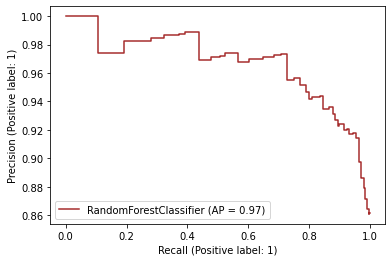

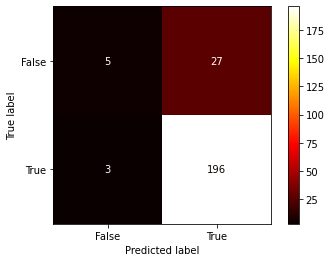

In [31]:
from sklearn import metrics
pred = rfc.predict(xtest)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
f1_score = (2 * precision * recall) / (precision + recall)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ',f1_score)
disp = plot_precision_recall_curve(rfc, xtest, ytest, color = 'brown')
confusion_matrix = metrics.confusion_matrix(ytest, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='hot')
plt.show()

### Prediction (KNN)

Precision:  0.8728070175438597
Recall:  1.0
F1 Score:  0.9320843091334895


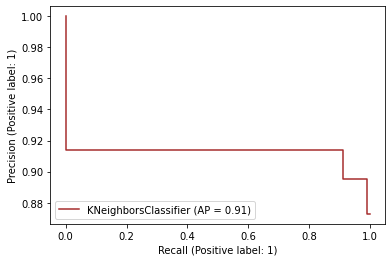

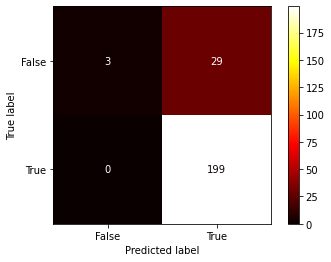

In [32]:
from sklearn import metrics
pred = knc.predict(xtest)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
f1_score = (2 * precision * recall) / (precision + recall)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ',f1_score)
disp = plot_precision_recall_curve(knc, xtest, ytest, color = 'brown')
confusion_matrix = metrics.confusion_matrix(ytest, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='hot')
plt.show()

### Prediction (GNB)

Precision:  0.967948717948718
Recall:  0.7587939698492462
F1 Score:  0.8507042253521127


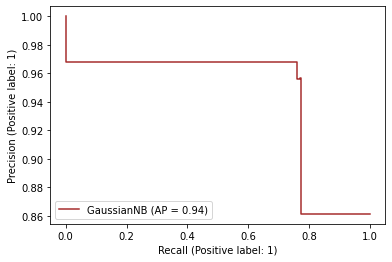

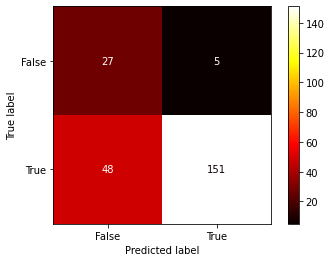

In [33]:
from sklearn import metrics
pred = gnb.predict(xtest)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
f1_score = (2 * precision * recall) / (precision + recall)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ',f1_score)
disp = plot_precision_recall_curve(gnb, xtest, ytest, color = 'brown')
confusion_matrix = metrics.confusion_matrix(ytest, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='hot')
plt.show()

### Prediction (LR)

Precision:  0.8722466960352423
Recall:  0.9949748743718593
F1 Score:  0.9295774647887324


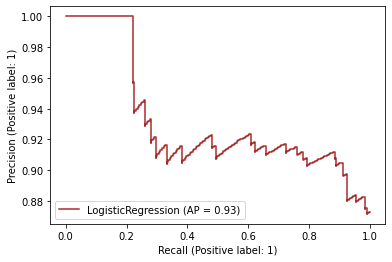

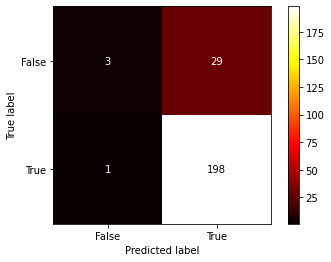

In [34]:
from sklearn import metrics
pred = lg.predict(xtest)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
f1_score = (2 * precision * recall) / (precision + recall)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ',f1_score)
disp = plot_precision_recall_curve(lg, xtest, ytest, color = 'brown')
confusion_matrix = metrics.confusion_matrix(ytest, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='hot')
plt.show()

### Prediction (DT)

Precision:  0.8910891089108911
Recall:  0.9045226130653267
F1 Score:  0.9295774647887324


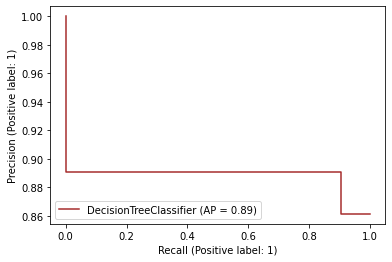

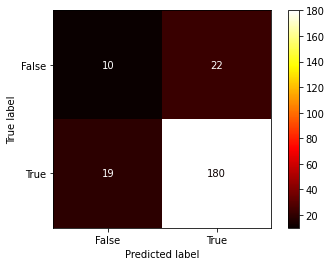

In [35]:
from sklearn import metrics
pred = dt.predict(xtest)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
ff1_score = (2 * precision * recall) / (precision + recall)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ',f1_score)
disp = plot_precision_recall_curve(dt, xtest, ytest, color = 'brown')
confusion_matrix = metrics.confusion_matrix(ytest, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='hot')
plt.show()